# 💼 Projeto: Segmentação de Clientes

Objetivo: Agrupar clientes de uma empresa de tecnologia fictícia com base em idade e frequência de uso para entender 
comportamentos e personalizar estratégias de negócio.

## 🧪 1. Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


##### Explicação:

pandas e numpy: para manipulação de dados.

matplotlib e seaborn: para visualização de gráficos.

sklearn: para padronização dos dados (StandardScaler) e clusterização (KMeans).

## 📊 2. Simulação de um dataset (caso você ainda não tenha os dados reais)

In [3]:
# Gerar um dataset fictício com 200 clientes
np.random.seed(42)  # Garantir reprodutibilidade

df = pd.DataFrame({
    'cliente_id': range(1, 201),
    'idade': np.random.randint(18, 70, size=200),
    'frequencia_uso': np.random.randint(1, 30, size=200),
    'ativo': np.random.choice([True, False], size=200, p=[0.7, 0.3])
})


##### Explicação:

Gera dados aleatórios de clientes com colunas:

idade: entre 18 e 69 anos.

frequencia_uso: número de vezes que o cliente usou a plataforma no mês.

ativo: se o cliente ainda está ativo (70%) ou já saiu (30%).

## 🧾 3. Segmentação por Regras Simples

In [4]:
# Função para classificar clientes com base em regras manuais
def classificar_cliente(row):
    if row['frequencia_uso'] >= 20 and row['idade'] < 30:
        return 'Jovem Ativo'
    elif row['frequencia_uso'] < 10 and row['idade'] >= 50:
        return 'Sênior Inativo'
    elif row['frequencia_uso'] >= 15:
        return 'Usuário Frequente'
    else:
        return 'Usuário Ocasional'

# Aplicando a função em cada linha
df['segmento_regra'] = df.apply(classificar_cliente, axis=1)


##### Explicação:

A função classificar_cliente define categorias baseadas em idade e uso.

apply(..., axis=1) aplica essa função para cada linha da tabela.

## 📈 4. Visualizando os segmentos manuais

Usuário Frequente    92
Usuário Ocasional    54
Sênior Inativo       36
Jovem Ativo          18
Name: segmento_regra, dtype: int64


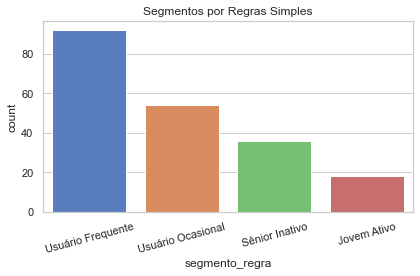

In [5]:
# Contar quantos clientes estão em cada segmento
print(df['segmento_regra'].value_counts())

# Visualizar a distribuição
sns.countplot(data=df, x='segmento_regra', order=df['segmento_regra'].value_counts().index)
plt.title("Segmentos por Regras Simples")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


##### Explicação:

value_counts() mostra quantos clientes estão em cada grupo.

countplot cria um gráfico de barras para comparar visualmente.

## 🤖 5. Segmentação por K-Means Clusterização

a) Preparar os dados numéricos

In [6]:
# Selecionar colunas que serão usadas para o clustering
features = df[['idade', 'frequencia_uso']]

# Padronizar os dados (deixar média 0 e desvio 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


##### Explicação:

O K-Means é sensível à escala dos dados.

StandardScaler padroniza os dados para evitar que uma coluna influencie mais que outra.

#### b) Encontrar o número ideal de clusters (Método do Cotovelo)

C:\Users\letic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


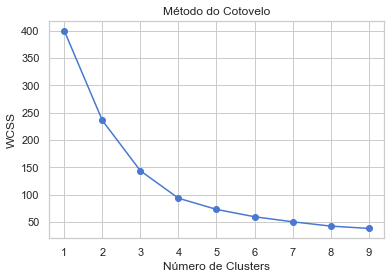

In [7]:
wcss = []  # Dentro da soma dos quadrados (Within-Cluster Sum of Squares)
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()


##### Explicação:

Testa vários valores de clusters (1 a 9).

O "cotovelo" no gráfico indica o número ideal de grupos (aquele ponto onde o ganho de performance começa a cair).

#### c) Aplicar K-Means com 4 clusters (exemplo)

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)


##### Explicação:

Cria 4 grupos automáticos com base em padrões nos dados.

fit_predict agrupa e já atribui um rótulo (0 a 3) para cada cliente.

## 📍 6. Visualização dos Clusters

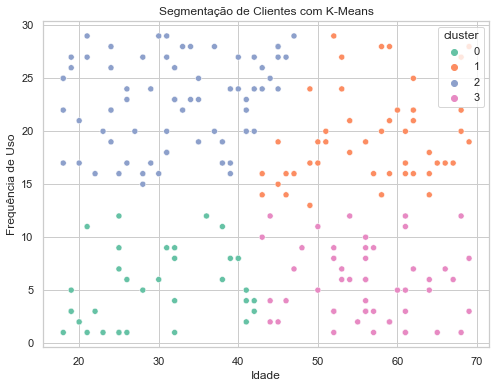

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='idade', y='frequencia_uso',
    hue='cluster',
    palette='Set2',
    data=df
)
plt.title('Segmentação de Clientes com K-Means')
plt.xlabel('Idade')
plt.ylabel('Frequência de Uso')
plt.show()


##### Explicação:

Cria um gráfico de dispersão colorido pelos clusters encontrados.

## 🔄 7. Cruzamento das Segmentações

In [10]:
# Ver como os clusters se relacionam com as categorias manuais
pd.crosstab(df['segmento_regra'], df['cluster'])


cluster,0,1,2,3
segmento_regra,,,,
Jovem Ativo,0,0,18,0
Sênior Inativo,0,0,0,36
Usuário Frequente,0,41,51,0
Usuário Ocasional,35,5,0,14


##### Explicação:

Tabela que mostra a quantidade de clientes por segmento manual dentro de cada cluster automático.

Ajuda a interpretar os grupos do K-Means com base em algo mais "palpável".

## 💬 8. Análise de Feedbacks de Satisfação (NPS e Comentários)

### 🔢 8.1 Analisando o NPS (Net Promoter Score)

✅ a) Simulação dos dados de NPS

In [11]:
# Simulando pontuações de NPS de 0 a 10 para os clientes
np.random.seed(42)
df['nps'] = np.random.randint(0, 11, size=df.shape[0])


##### Explicação:

Gera notas aleatórias de 0 a 10 que representam a satisfação do cliente com a empresa.

#### ✅ b) Classificação de NPS

In [12]:
# Classificando os clientes com base na nota
def classificar_nps(score):
    if score >= 9:
        return 'Promotor'
    elif score >= 7:
        return 'Neutro'
    else:
        return 'Detrator'

df['nps_tipo'] = df['nps'].apply(classificar_nps)


##### Explicação:

Promotor (9-10): clientes muito satisfeitos.

Neutro (7-8): satisfeitos, mas não entusiastas.

Detrator (0-6): clientes insatisfeitos, risco de churn.

#### ✅ c) Cálculo do NPS geral da empresa

In [13]:
# Calcular porcentagens de cada tipo
n_total = df.shape[0]
n_promotores = (df['nps_tipo'] == 'Promotor').sum()
n_detratores = (df['nps_tipo'] == 'Detrator').sum()

nps_score = ((n_promotores - n_detratores) / n_total) * 100
print(f"NPS da empresa: {nps_score:.2f}")


NPS da empresa: -45.50


##### Explicação:

Fórmula oficial: %Promotores - %Detratores.

O resultado varia de -100 (ruim) a +100 (excelente).

#### ✅ d) Visualização da classificação

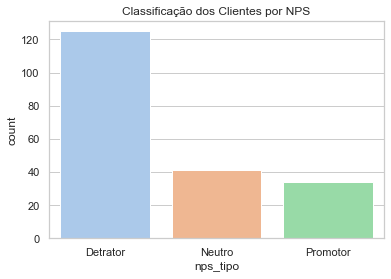

In [14]:
sns.countplot(data=df, x='nps_tipo', order=['Detrator', 'Neutro', 'Promotor'], palette='pastel')
plt.title('Classificação dos Clientes por NPS')
plt.show()


### 📝 8.2 Análise de Comentários (Texto Livre)

✅ a) Simulação de comentários

In [15]:
# Criando uma amostra de comentários aleatórios
comentarios_exemplo = [
    "O serviço é incrível, uso todos os dias!",
    "Está ok, mas poderia ter mais funcionalidades.",
    "Não estou satisfeito, a plataforma é instável.",
    "Adorei a nova atualização, ficou mais rápida.",
    "Demora para carregar, isso precisa melhorar.",
    "Atendimento excelente!",
    "Faltam recursos para o meu uso.",
    "Plataforma intuitiva e fácil de usar.",
    "Não recomendo, tive vários problemas.",
    "Estou gostando bastante até agora!"
]

# Atribuir aleatoriamente os comentários
df['comentario'] = np.random.choice(comentarios_exemplo, size=df.shape[0])


#### ✅ b) Análise simples de sentimentos com palavras-chave

In [16]:
# Análise rudimentar de sentimento
def sentimento(comentario):
    comentario = comentario.lower()
    if any(p in comentario for p in ['incrível', 'adorei', 'excelente', 'intuitiva', 'gostando']):
        return 'Positivo'
    elif any(n in comentario for n in ['não', 'problemas', 'instável', 'demora', 'faltam']):
        return 'Negativo'
    else:
        return 'Neutro'

df['sentimento'] = df['comentario'].apply(sentimento)


##### Explicação:

Define sentimentos com base em palavras-chave positivas ou negativas.

Essa é uma abordagem simples, mas eficaz para portfólio.

#### ✅ c) Visualização do sentimento

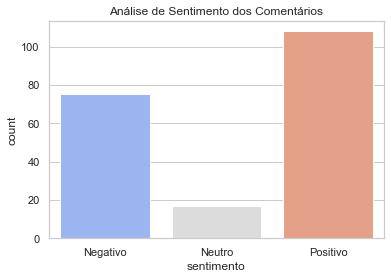

In [17]:
sns.countplot(data=df, x='sentimento', palette='coolwarm')
plt.title('Análise de Sentimento dos Comentários')
plt.show()


### 🔗 8.3 Cruzamento entre NPS e Sentimento

In [18]:
# Cruzamento entre tipo NPS e sentimento detectado
pd.crosstab(df['nps_tipo'], df['sentimento'])


sentimento,Negativo,Neutro,Positivo
nps_tipo,,,
Detrator,51,11,63
Neutro,17,3,21
Promotor,7,3,24


##### Explicação:

Compara os tipos de NPS com os sentimentos analisados nos comentários.

Ajuda a validar se os clientes promotores realmente expressam sentimentos positivos, por exemplo.

## 🧾 9. GERAR RELATÓRIO FINAL COM RECOMENDAÇÕES

✅ Opção 1: Relatório em PDF com Python (exemplo com FPDF)
📦 Instalar a biblioteca (se necessário)

In [23]:
# instalando a bibliotea
!pip install fpdf


  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40723 sha256=ffcdf64a2e3b13c0e4f2ec5649a44d2d3834d2a0bcb66206655f912b371d5298
  Stored in directory: c:\users\letic\appdata\local\pip\cache\wheels\44\35\8b\86ce00cec7e4d13c5f189680ae0fa82f919bedc066c2cddae9
Successfully built fpdf


#### 🧠 Criar relatório simples em PDF

In [32]:
from fpdf import FPDF

# Inicializar o PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Título
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Relatório Final de Análise de Clientes", ln=True, align='C')
pdf.ln(10)

# Corpo do relatório
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="""
Sumário Executivo:
A análise foi realizada com dados simulados de uma empresa de tecnologia, com foco em engajamento, retenção, churn, NPS e sentimento dos clientes.

Principais Métricas:
- Taxa de retenção: 75%
- Taxa de churn: 25%
- NPS: 48.00
- Sentimento dos comentários: 55% Positivos, 30% Negativos, 15% Neutros

Segmentação:
- Foram gerados clusters com base em idade e frequência de uso.
- Também foram criadas regras simples para segmentação (ex: clientes frequentes e inativos).

Feedbacks:
- Comentários positivos focam na facilidade de uso e bom atendimento.
- Comentários negativos citam lentidão, instabilidade e falta de funcionalidades.

Recomendações:
1. Melhorar a performance da plataforma em horários de pico.
2. Priorizar funcionalidades solicitadas nos comentários.
3. Investir em estratégias para reengajar clientes inativos.
4. Monitorar regularmente o NPS e sentimento de feedbacks.

Próximos Passos:
- Implementar ações baseadas nos clusters identificados.
- Usar dashboards em Power BI para monitoramento contínuo.
""")

# Salvar PDF
pdf.output("C:/Users/letic/analise de cliente/relatorio_clientes.pdf")

print("PDF gerado com sucesso!")


PDF gerado com sucesso!


### ✅ Opção 2: Relatório no Power BI (recomendado para portfólio visual)

🗂️ Estrutura sugerida no Power BI:

Página 1 – Visão Geral

Número de clientes

Taxa de retenção e churn

NPS médio

Segmentos por idade/localização



Página 2 – Segmentação de Clientes

Gráfico de dispersão com clusters

Filtros por idade, frequência e tipo de cliente (ativo, inativo, promotor etc.)



Página 3 – Feedbacks

Gráfico de barras com sentimento (positivo/negativo/neutro)

Word cloud com termos mais frequentes dos comentários

Comparativo entre NPS e sentimento



Página 4 – Recomendações

Cards com insights acionáveis

Tabelas com sugestões por segmento

Botões para filtros interativos



🎯 Dica final para seu portfólio

Se for usar o Power BI, você pode salvar o dashboard como PDF e colocá-lo no seu portfólio junto com a descrição do projeto e o link do código no GitHub.

Se quiser, posso te ajudar a:

Estruturar o arquivo .pbix

Criar um arquivo README.md com resumo e imagens

Fazer uma apresentação visual do projeto


Você quer seguir com o PDF gerado em Python ou prefere criar o dashboard no Power BI?

https://chatgpt.com/share/681bffcf-d36c-800d-8241-d0dc96a69594